<a href="https://colab.research.google.com/github/Belajargihh/YOLO11_Alat_Tulis/blob/main/YOLO11_Alat_Tulis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install library utama
!pip install ultralytics roboflow --quiet

# Verifikasi GPU
import torch
print(f"GPU Active: {torch.cuda.is_available()}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/12

In [2]:
from roboflow import Roboflow

# Initialize Roboflow
rf = Roboflow(api_key="PhgSeV1vhTBmDXxtzmJ2")  # Ganti dengan API key Anda
project = rf.workspace("object-detection-nsvxf").project("alat_tulis-2gsd7")  # Contoh: rf.workspace("yolo-v11").project("alat-tulis")
dataset = project.version(1).download("yolov8")  # Format YOLOv8 (kompatibel dengan YOLOv11)

print(f"Dataset saved to: {dataset.location}")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Alat_Tulis-1 in yolov8:: 100%|██████████| 2890/2890 [00:00<00:00, 8048.54it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Dataset saved to: /content/Alat_Tulis-1


In [3]:
from ultralytics import YOLO

# Load model YOLOv11n (nano version)
model = YOLO("yolo11n.pt")  # Model akan otomatis di-download

# Training
results = model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=100,  # Ditambah dari 50
    imgsz=640,
    batch=64,
    device="0",
    name="yolo11n_augmented",
    augment=True,  # Pastikan augmentasi aktif
    hsv_h=0.015,   # Hue augmentation
    hsv_s=0.7,     # Saturation augmentation
    hsv_v=0.4,     # Value augmentation
    degrees=45.0,  # Rotasi (-45 sampai +45 derajat)
    translate=0.2, # Translasi (20% dari image size)
    scale=0.5,     # Skala (50% zoom in/out)
    shear=10.0,    # Shearing
    perspective=0.001,  # Transformasi perspektif
    flipud=0.5,    # Flip vertikal (50% probability)
    fliplr=0.5,    # Flip horizontal (50% probability)
    mosaic=1.0,    # Mosaic augmentation (100% probability)
    mixup=0.2,     # Mixup augmentation (20% probability)
    copy_paste=0.2 # Copy-paste augmentation (20% probability)
)

100%|██████████| 5.35M/5.35M [00:00<00:00, 103MB/s]


Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Alat_Tulis-1/data.yaml, degrees=45.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo11n_augmented, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.001, plots=True, pose=1

100%|██████████| 755k/755k [00:00<00:00, 18.5MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

 10                  -1  1    249728  ultralytics.nn.modules.block.C2PSA           [256, 256, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1    111296  ultralytics.nn.modules.block.C3k2            [384, 128, 1, False]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1     32096  ultralytics.nn.modules.block.C3k2            [256, 64, 1, False]           
 17                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

train: Scanning /content/Alat_Tulis-1/train/labels... 1259 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1259/1259 [00:00<00:00, 2553.01it/s]


train: New cache created: /content/Alat_Tulis-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 436.5±129.2 MB/s, size: 50.8 KB)


val: Scanning /content/Alat_Tulis-1/valid/labels... 120 images, 0 backgrounds, 0 corrupt: 100%|██████████| 120/120 [00:00<00:00, 2063.83it/s]

val: New cache created: /content/Alat_Tulis-1/valid/labels.cache


Plotting labels to runs/detect/yolo11n_augmented/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolo11n_augmented
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      8.84G      2.151      3.567      2.441        186        640: 100%|██████████| 20/20 [00:31<00:00,  1.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]

                   all        120        139    0.00339      0.696      0.111     0.0431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.15G      1.693       3.11      2.051        147        640: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all        120        139    0.00368      0.877      0.256      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.08G      1.665      2.801       2.04        170        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

                   all        120        139       0.23      0.257      0.203     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.18G      1.661      2.696      2.045        142        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.73s/it]

                   all        120        139       0.44       0.12      0.163     0.0638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.17G      1.674      2.663      2.073        160        640: 100%|██████████| 20/20 [00:23<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all        120        139      0.524     0.0104     0.0179    0.00372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.17G      1.671      2.628      2.059        142        640: 100%|██████████| 20/20 [00:23<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all        120        139     0.0668     0.0884     0.0245    0.00615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.25G      1.664      2.554      2.074        149        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.25s/it]

                   all        120        139      0.174      0.189      0.121     0.0393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.09G      1.654      2.469      2.055        153        640: 100%|██████████| 20/20 [00:37<00:00,  1.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all        120        139      0.161      0.255      0.162     0.0523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       8.2G      1.638      2.454      2.051        164        640: 100%|██████████| 20/20 [00:27<00:00,  1.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all        120        139      0.329       0.19       0.17     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.18G      1.596       2.37       2.01        161        640: 100%|██████████| 20/20 [00:27<00:00,  1.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.84s/it]

                   all        120        139      0.329      0.295      0.235     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.23G      1.571      2.323      1.998        149        640: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all        120        139      0.472      0.299      0.316      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.16G      1.563       2.29      1.983        172        640: 100%|██████████| 20/20 [00:23<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all        120        139      0.371       0.46      0.374      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100       8.2G      1.568      2.269      1.979        139        640: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.46s/it]

                   all        120        139       0.42      0.496       0.44      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.17G      1.538      2.216      1.965        169        640: 100%|██████████| 20/20 [00:27<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all        120        139      0.571      0.129      0.141     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.15G      1.533      2.145      1.942        158        640: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all        120        139      0.414      0.412      0.388      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.23G      1.517      2.167       1.94        152        640: 100%|██████████| 20/20 [00:23<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all        120        139      0.417      0.262      0.277      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.12G      1.486      2.094      1.909        124        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.58s/it]

                   all        120        139       0.54      0.497      0.486      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.17G      1.477      2.098      1.901        142        640: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.42s/it]

                   all        120        139      0.591      0.445      0.519      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       8.1G      1.497      2.126      1.913        144        640: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        120        139      0.626       0.32      0.291      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.12G      1.477      2.031      1.913        129        640: 100%|██████████| 20/20 [00:26<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

                   all        120        139      0.473       0.59       0.54      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.22G      1.479      2.027      1.892        133        640: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.20s/it]

                   all        120        139       0.56      0.444      0.407      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.16G      1.453      1.967      1.871        159        640: 100%|██████████| 20/20 [00:34<00:00,  1.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all        120        139      0.478      0.444      0.452      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.14G      1.462      2.012      1.881        155        640: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.70s/it]

                   all        120        139       0.52      0.542      0.516      0.238



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.15G      1.455       1.98      1.886        156        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.72s/it]

                   all        120        139      0.502      0.563      0.521      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100       8.2G      1.447      1.957      1.865        139        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all        120        139      0.523      0.577      0.572      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.17G       1.43       1.95      1.875        158        640: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all        120        139      0.759      0.542      0.628      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.09G      1.434      1.865      1.842        143        640: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all        120        139      0.487      0.572       0.56       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.11G      1.414      1.901      1.854        153        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all        120        139      0.656      0.585      0.633      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.19G      1.394      1.856      1.829        149        640: 100%|██████████| 20/20 [00:23<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.38s/it]

                   all        120        139      0.575      0.575       0.59      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.11G      1.429       1.85      1.848        147        640: 100%|██████████| 20/20 [00:22<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.00s/it]

                   all        120        139      0.484      0.656      0.595       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.19G      1.437      1.919      1.866        174        640: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

                   all        120        139      0.623      0.599      0.641      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.21G      1.392       1.82      1.815        194        640: 100%|██████████| 20/20 [00:24<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all        120        139      0.696      0.569      0.639      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.21G      1.393        1.8      1.827        159        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all        120        139      0.672      0.539      0.609      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100       8.1G       1.37      1.775      1.812        153        640: 100%|██████████| 20/20 [00:26<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        120        139      0.638      0.654      0.669       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.15G      1.378      1.764      1.806        155        640: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.53s/it]

                   all        120        139       0.62       0.65      0.649      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.15G      1.374      1.768      1.806        144        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.90s/it]

                   all        120        139      0.592      0.683       0.67      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.21G      1.369      1.751      1.796        154        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        120        139      0.682      0.631      0.683      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100       8.1G      1.396      1.793      1.823        149        640: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all        120        139      0.636      0.499      0.588      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.16G      1.381      1.696      1.801        156        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all        120        139      0.687      0.638      0.673      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.17G      1.345      1.742      1.789        141        640: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.28s/it]

                   all        120        139      0.658      0.711       0.71      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.15G      1.342      1.715      1.785        159        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all        120        139      0.651      0.684      0.723      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.16G       1.37      1.699      1.805        155        640: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all        120        139      0.716      0.648      0.709      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.15G      1.356      1.714      1.785        152        640: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.71s/it]

                   all        120        139      0.622      0.616      0.655      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.18G      1.352      1.689      1.786        150        640: 100%|██████████| 20/20 [00:25<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all        120        139      0.681      0.629      0.687      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.25G      1.321      1.666      1.767        159        640: 100%|██████████| 20/20 [00:28<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all        120        139      0.591      0.672      0.655      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.25G       1.33      1.643      1.766        160        640: 100%|██████████| 20/20 [00:33<00:00,  1.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all        120        139      0.683      0.552      0.667      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.19G      1.348      1.682       1.77        157        640: 100%|██████████| 20/20 [00:33<00:00,  1.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all        120        139      0.643      0.651      0.662      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.12G      1.316      1.646      1.755        164        640: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all        120        139      0.638      0.663      0.642      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.21G      1.305      1.588      1.756        155        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all        120        139      0.727      0.674      0.717      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.17G      1.319      1.591      1.748        158        640: 100%|██████████| 20/20 [00:22<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all        120        139      0.582      0.732      0.722      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.13G        1.3      1.611      1.747        162        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.87s/it]

                   all        120        139      0.669      0.735      0.748      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.18G      1.332      1.607      1.751        170        640: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.52s/it]

                   all        120        139      0.659      0.676      0.719      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.15G      1.315      1.622      1.758        155        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all        120        139      0.683       0.65      0.717      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.21G      1.318      1.582      1.748        154        640: 100%|██████████| 20/20 [00:25<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all        120        139      0.654      0.709      0.727      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.23G      1.308      1.548      1.735        158        640: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.41s/it]

                   all        120        139      0.723      0.755      0.751      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.18G      1.293      1.558      1.738        138        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]

                   all        120        139      0.693      0.711      0.706      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.23G      1.296      1.529      1.732        175        640: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all        120        139      0.722      0.682       0.71      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.25G      1.293      1.535      1.731        170        640: 100%|██████████| 20/20 [00:31<00:00,  1.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        120        139      0.689      0.676      0.737      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.15G      1.278      1.533      1.722        125        640: 100%|██████████| 20/20 [00:28<00:00,  1.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all        120        139      0.684       0.71      0.732      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.16G      1.259      1.504      1.715        138        640: 100%|██████████| 20/20 [00:25<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]

                   all        120        139      0.738      0.778      0.811      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.21G      1.268      1.477      1.704        159        640: 100%|██████████| 20/20 [00:27<00:00,  1.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all        120        139      0.726      0.674      0.751      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.21G      1.282      1.481      1.713        144        640: 100%|██████████| 20/20 [00:50<00:00,  2.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.22s/it]

                   all        120        139       0.66       0.76      0.779      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.21G      1.264      1.464      1.695        148        640: 100%|██████████| 20/20 [00:45<00:00,  2.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.05s/it]

                   all        120        139      0.655      0.702      0.716       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.15G       1.26      1.507      1.705        155        640: 100%|██████████| 20/20 [00:26<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all        120        139       0.68      0.804      0.764      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.15G      1.252      1.469      1.682        157        640: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all        120        139      0.664      0.748      0.726      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       8.1G       1.25      1.451       1.69        172        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

                   all        120        139      0.771       0.64      0.712      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.21G      1.269      1.462      1.704        141        640: 100%|██████████| 20/20 [00:23<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all        120        139      0.725      0.676      0.716      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.16G      1.256      1.453      1.696        125        640: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]

                   all        120        139      0.678       0.79      0.735      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.14G      1.228      1.438      1.673        146        640: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all        120        139        0.7      0.777       0.74      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.26G      1.227      1.423      1.672        158        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.67s/it]

                   all        120        139      0.692      0.786      0.785      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.21G      1.228      1.394      1.683        138        640: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.92s/it]

                   all        120        139      0.712      0.766      0.757      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.17G      1.228      1.411      1.668        137        640: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.60s/it]

                   all        120        139      0.707      0.734      0.736      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.18G      1.221      1.402      1.666        153        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all        120        139      0.715      0.813      0.786       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.12G      1.232      1.419      1.675        139        640: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all        120        139      0.716       0.69      0.725      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.17G      1.224        1.4      1.669        151        640: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.15s/it]

                   all        120        139      0.805       0.74      0.796      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.17G      1.212      1.396      1.669        141        640: 100%|██████████| 20/20 [00:23<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all        120        139      0.759      0.749      0.788      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.14G      1.206       1.36      1.654        166        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.29s/it]

                   all        120        139      0.745      0.747      0.761      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       8.2G      1.202      1.371      1.654        139        640: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]

                   all        120        139      0.747      0.758      0.795      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       8.2G      1.201      1.367      1.651        141        640: 100%|██████████| 20/20 [00:24<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.08s/it]

                   all        120        139      0.768      0.778      0.786      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.11G      1.217      1.359      1.664        143        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.83s/it]

                   all        120        139       0.74      0.774      0.777      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.21G      1.205      1.367      1.643        154        640: 100%|██████████| 20/20 [00:24<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all        120        139      0.814      0.712      0.798      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.15G       1.19       1.35      1.639        163        640: 100%|██████████| 20/20 [00:24<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        120        139       0.76      0.785      0.778      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.09G      1.208      1.351      1.649        167        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]

                   all        120        139       0.75       0.78      0.762      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.12G       1.17      1.313      1.625        145        640: 100%|██████████| 20/20 [00:23<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all        120        139      0.797      0.744      0.788      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.15G      1.186      1.345       1.64        149        640: 100%|██████████| 20/20 [00:25<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all        120        139      0.733      0.788      0.791      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.25G      1.154      1.314      1.611        161        640: 100%|██████████| 20/20 [00:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]

                   all        120        139      0.773      0.727      0.762       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.13G      1.166      1.291      1.624        152        640: 100%|██████████| 20/20 [00:23<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.25s/it]

                   all        120        139      0.723      0.746      0.762      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.09G      1.171      1.312      1.617        148        640: 100%|██████████| 20/20 [00:22<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.97s/it]

                   all        120        139       0.75      0.747      0.739      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.21G      1.171      1.301      1.627        150        640: 100%|██████████| 20/20 [00:24<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

                   all        120        139      0.717        0.8      0.783      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100       8.1G      1.161      1.313      1.616        138        640: 100%|██████████| 20/20 [00:24<00:00,  1.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.35s/it]

                   all        120        139      0.784      0.789      0.795      0.511


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       8.2G     0.8505     0.8628      1.499         49        640: 100%|██████████| 20/20 [00:23<00:00,  1.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]

                   all        120        139      0.769      0.735      0.796      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.17G     0.8306     0.6635       1.48         49        640: 100%|██████████| 20/20 [00:18<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]

                   all        120        139      0.776      0.766      0.794      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.15G     0.8149     0.6094      1.462         51        640: 100%|██████████| 20/20 [00:17<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        120        139      0.743      0.811      0.799      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.17G     0.8011     0.5889      1.454         45        640: 100%|██████████| 20/20 [00:18<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.40s/it]

                   all        120        139      0.824      0.732      0.809      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.17G     0.7796     0.5593      1.446         53        640: 100%|██████████| 20/20 [00:18<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.36s/it]

                   all        120        139      0.789      0.768      0.807      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.09G     0.7958     0.5476      1.432         52        640: 100%|██████████| 20/20 [00:17<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.49s/it]

                   all        120        139      0.795      0.781      0.818      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       8.2G     0.7964     0.5399      1.435         47        640: 100%|██████████| 20/20 [00:18<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.31s/it]

                   all        120        139      0.758      0.802      0.813      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.09G      0.793     0.5355      1.427         46        640: 100%|██████████| 20/20 [00:19<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.47s/it]

                   all        120        139      0.786      0.783      0.805      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.17G     0.7929     0.5393      1.426         50        640: 100%|██████████| 20/20 [00:18<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.89s/it]

                   all        120        139      0.818      0.759      0.792      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.17G       0.78     0.5257      1.427         48        640: 100%|██████████| 20/20 [00:18<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

                   all        120        139      0.808      0.778      0.803      0.534



100 epochs completed in 0.794 hours.
Optimizer stripped from runs/detect/yolo11n_augmented/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/yolo11n_augmented/weights/best.pt, 5.5MB

Validating runs/detect/yolo11n_augmented/weights/best.pt...
Ultralytics 8.3.137 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


                   all        120        139      0.825      0.817      0.845      0.567
                  Buku         23         25      0.904       0.88      0.942      0.633
                  Pena         29         32      0.777      0.812      0.812      0.552
             Penghapus         39         49      0.765      0.939      0.873      0.581
                Pensil         30         33      0.855      0.636      0.753      0.501
Speed: 0.2ms preprocess, 6.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolo11n_augmented


Saving id-11134103-7r98x-lyc7icw2qotcde.jpg to id-11134103-7r98x-lyc7icw2qotcde.jpg

image 1/1 /content/id-11134103-7r98x-lyc7icw2qotcde.jpg: 640x384 2 Penghapuss, 46.8ms
Speed: 3.1ms preprocess, 46.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2

🔍 Hasil Deteksi:


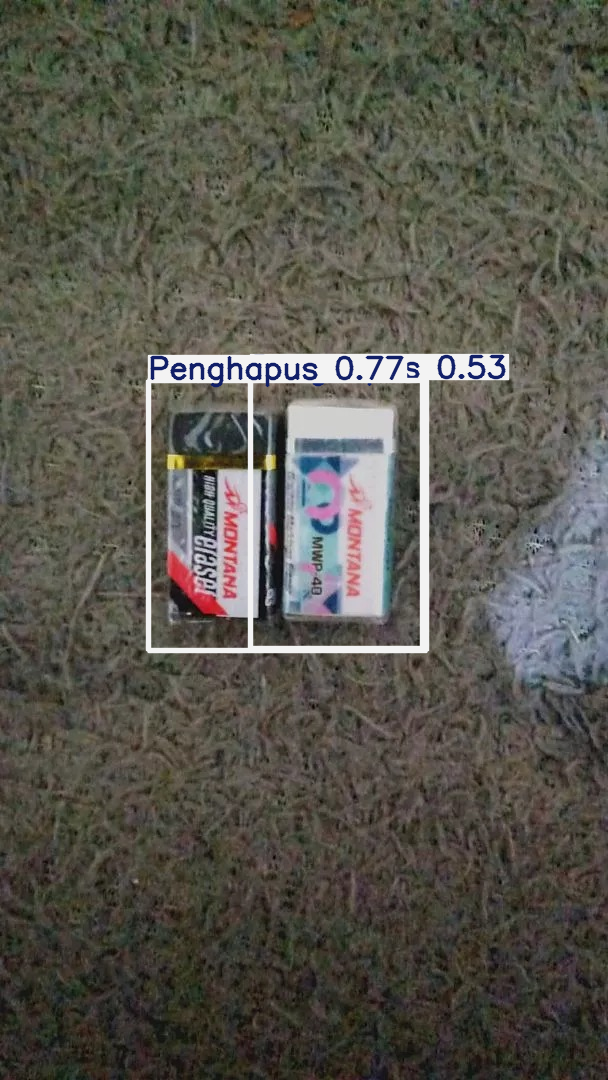


Objek 1:
  - Kelas: Penghapus (ID: 2)
  - Confidence: 0.77
  - Koordinat Bounding Box: [148.74827575683594, 380.3145446777344, 426.418701171875, 650.6280517578125]

Objek 2:
  - Kelas: Penghapus (ID: 2)
  - Confidence: 0.53
  - Koordinat Bounding Box: [250.47535705566406, 379.30047607421875, 422.39202880859375, 648.4197998046875]


In [5]:
from ultralytics import YOLO
from IPython.display import display, Image
import os
from google.colab import files

# 1. Upload Gambar via Colab
uploaded = files.upload()
uploaded_image = list(uploaded.keys())[0]  # Ambil nama file pertama yang diupload

# 2. Load Model YOLOv11 (Pastikan model sudah ada)
model = YOLO("/content/runs/detect/yolo11n_augmented/weights/best.pt")  # Ganti dengan path model Anda

# 3. Jalankan Prediksi
results = model.predict(
    source=uploaded_image,
    conf=0.5,
    save=True,
    show_labels=True,
    show_conf=True,
    line_width=2
)

# 4. Tampilkan Hasil
print("\n🔍 Hasil Deteksi:")
for result in results:
    result.show()  # Tampilkan gambar dengan bounding box

# 5. Informasi Deteksi
for i, det in enumerate(results[0].boxes):
    print(f"\nObjek {i+1}:")
    print(f"  - Kelas: {model.names[int(det.cls)]} (ID: {int(det.cls)})")
    print(f"  - Confidence: {det.conf.item():.2f}")
    print(f"  - Koordinat Bounding Box: {det.xyxy.tolist()[0]}")